In [217]:
import matplotlib.pyplot as plt
import numpy as np

In [218]:
intercepts = np.random.normal(0, 5, 100)
x = np.random.normal(50, 15, 100)
y = x + intercepts
xys = np.vstack((x, y))
rot = np.array([np.cos(np.pi / 6), -np.sin(np.pi / 6), np.sin(np.pi / 6), np.cos(np.pi / 6)]).reshape(2, 2)
xys = rot @ xys
x = np.maximum(0, np.minimum(xys[0, :], 100))
y = np.maximum(0, np.minimum(xys[1, :], 100))
x_bar = x - np.mean(x)
y_bar = y - np.mean(y)

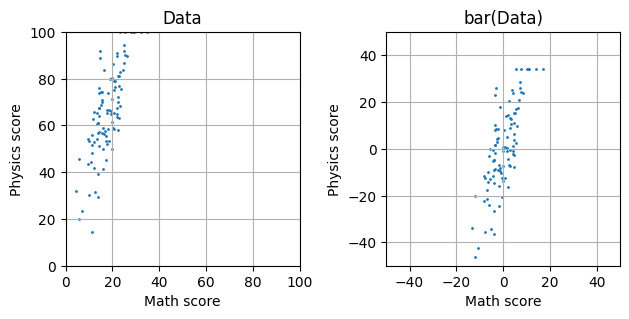

In [219]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title("Data")
axes[0].scatter(x, y, s=1.0)
axes[0].set_xlabel("Math score")
axes[0].set_ylabel("Physics score")
axes[0].set_xlim([0, 100])
axes[0].set_ylim([0, 100])
axes[0].set_aspect("equal")
axes[0].grid()

axes[1].set_title("bar(Data)")
axes[1].scatter(x_bar, y_bar, s=1.0)
axes[1].set_xlabel("Math score")
axes[1].set_ylabel("Physics score")
axes[1].set_xlim([-50, 50])
axes[1].set_ylim([-50, 50])
axes[1].set_aspect("equal")
axes[1].grid()

fig.tight_layout()
plt.show()

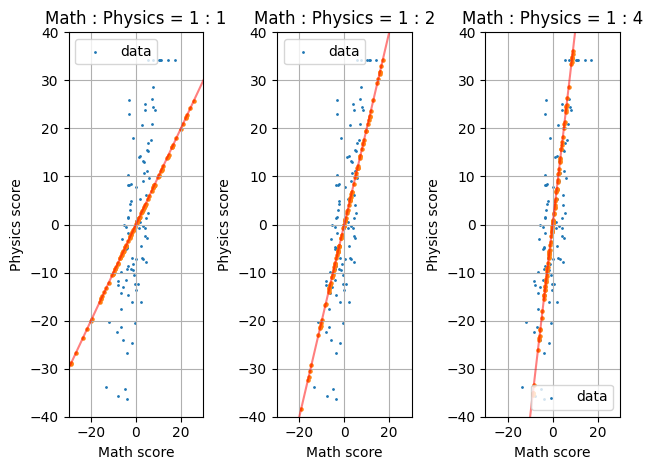

In [220]:
xy = np.hstack((x_bar.reshape(-1, 1), y_bar.reshape(-1, 1)))

fig, axes = plt.subplots(1, 3)

for i, r in enumerate([1, 2, 4]):
    axes[i].set_title(f"Math : Physics = 1 : {r}")
    axes[i].scatter(x_bar, y_bar, s=1.0, label="data")
    vec = np.array([1, r]).reshape(2, 1).astype("float64")
    vec /= np.linalg.norm(vec)
    scale = (xy @ vec)
    prj = np.hstack((scale * vec[0, 0], scale * vec[1, 0]))
    axes[i].grid()
    axes[i].legend()
    axes[i].set_xlabel("Math score")
    axes[i].set_ylabel("Physics score")
    axes[i].set_xlim([-30, 30])
    axes[i].set_ylim([-40, 40])
    axes[i].plot([-100, 100], [-100 * r, 100 * r], "r", alpha=0.5)
    axes[i].scatter(prj[:, 0], prj[:, 1], s=5.0, label="projected")
fig.tight_layout()
plt.show()

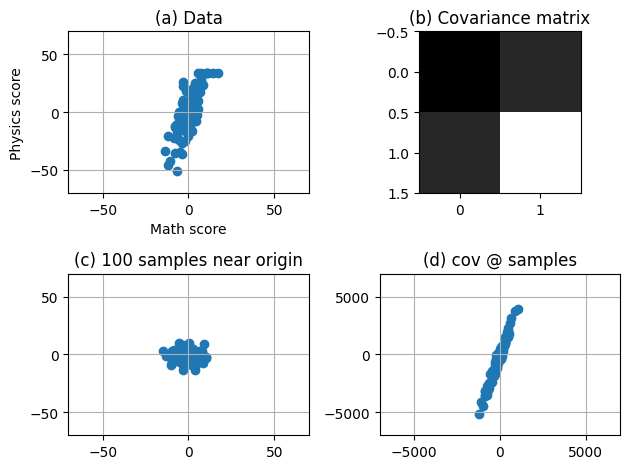

In [221]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].set_title("(a) Data")
axes[0, 0].scatter(xy[:, 0], xy[:, 1])
axes[0, 0].set_xlabel("Math score")
axes[0, 0].set_ylabel("Physics score")
axes[0, 0].set_xlim([-70, 70])
axes[0, 0].set_ylim([-70, 70])
axes[0, 0].grid()

cov = xy.T @ xy / (99)
axes[0, 1].set_title("(b) Covariance matrix")
axes[0, 1].imshow(cov, cmap="gray")

rxy = np.random.normal(0, 5, (2, 100))
axes[1, 0].set_title("(c) 100 samples near origin")
axes[1, 0].scatter(rxy[0, :], rxy[1, :])
axes[1, 0].set_xlim([-70, 70])
axes[1, 0].set_ylim([-70, 70])
axes[1, 0].grid()

var = cov @ rxy
axes[1, 1].set_title("(d) cov @ samples")
axes[1, 1].scatter(var[0, :], var[1, :])
axes[1, 1].set_xlim([-7000, 7000])
axes[1, 1].set_ylim([-7000, 7000])
axes[1, 1].grid()

fig.tight_layout()
plt.show()